<a href="https://colab.research.google.com/github/evanphilipsmith/infant-cry-prediction/blob/main/predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dependencies and Imports

In [ ]:
![ ! -f utils.py ] && wget https://raw.githubusercontent.com/evanphilipsmith/infant-cry-prediction/main/utils.py
![ ! -f dataset.py ] && wget https://raw.githubusercontent.com/evanphilipsmith/infant-cry-prediction/main/dataset.py
![ ! -f network.py ] && wget https://raw.githubusercontent.com/evanphilipsmith/infant-cry-prediction/main/network.py
![ ! -f sample-tired.m4a ] && wget https://raw.githubusercontent.com/evanphilipsmith/infant-cry-prediction/main/sample-tired.m4a
![ ! -f pretrained_model.pth ] && wget https://raw.githubusercontent.com/evanphilipsmith/infant-cry-prediction/main/pretrained_model.pth
!pip install torch==1.7.1+cu101 torchvision==0.8.2+cu101 torchaudio==0.7.2 -f https://download.pytorch.org/whl/torch_stable.html
![ ! -d donateacry-corpus ] && git clone https://github.com/gveres/donateacry-corpus.git

In [ ]:
import torch
from IPython.display import Audio, display
from utils import load_checkpoint, open_audio_file, plot_waveform, test_a_waveform
from dataset import DonateACryDataset

assert torch.cuda.is_available(), "Select a GPU from Runtime -> Change runtime type"

# Predict
Open a file

sample-tired.m4a


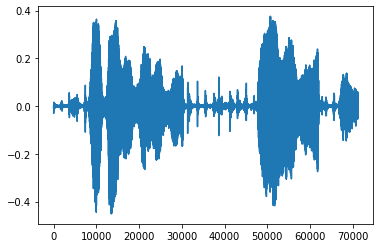

In [4]:
filepath = 'sample-tired.m4a'
print(filepath)
waveform, sample_rate = open_audio_file(filepath)
plot_waveform(waveform)
display(Audio(waveform, rate=sample_rate))

Load the model

In [7]:
clean_dirs = ['./donateacry-corpus/donateacry_corpus_cleaned_and_updated_data/']
clean_train_data = DonateACryDataset(clean_dirs, train=True, drop_hungry=0.75)
saved_model = load_checkpoint('pretrained_model.pth', dir='./').cuda()

Make a prediction

In [9]:
prediction, distribution = test_a_waveform(waveform, saved_model, clean_train_data.target_decoding)
print(prediction)
print(distribution)

discomfort
{'belly pain': -2.0629594, 'discomfort': 2.827331, 'tired': 1.4583235, 'hungry': -0.9475028, 'needs burping': -2.4672759}
